based on: https://www.youtube.com/watch?v=OXwZtlcTiuk&t=166s&ab_channel=Simplilearn
data download: https://finance.yahoo.com/quote/TSLA/history?p=TSLA

another notebook: https://www.kaggle.com/code/semihgnak/google-stock-price-prediction-ar-ma-lstm-99

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

#building model
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
#linear model
from sklearn.linear_model import LinearRegression

#creating model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#for model eval
from sklearn.metrics import r2_score, mean_squared_error as mse

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#plot stuff
from statsmodels.graphics.tsaplots import plot_pacf
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [2]:
tesla = pd.read_csv('TSLA.csv')

In [3]:
tesla.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3418 non-null   object 
 1   Open       3418 non-null   float64
 2   High       3418 non-null   float64
 3   Low        3418 non-null   float64
 4   Close      3418 non-null   float64
 5   Adj Close  3418 non-null   float64
 6   Volume     3418 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 187.0+ KB


### EDA

In [5]:
tesla.Date = pd.to_datetime(tesla['Date'])

In [6]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2024-01-26 00:00:00
Total Days = 4959 days


In [7]:
tesla.describe()

Date         Open         High          Low  \
count                           3418  3418.000000  3418.000000  3418.000000   
mean   2017-04-11 12:06:19.169104640    71.292632    72.853138    69.603821   
min              2010-06-29 00:00:00     1.076000     1.108667     0.998667   
25%              2013-11-18 06:00:00    10.855166    11.164000    10.678334   
50%              2017-04-11 12:00:00    17.006666    17.254999    16.712668   
75%              2020-09-01 18:00:00   120.279999   123.557499   117.074998   
max              2024-01-26 00:00:00   411.470001   414.496674   405.666656   
std                              NaN   101.892258   104.147762    99.399379   

             Close    Adj Close        Volume  
count  3418.000000  3418.000000  3.418000e+03  
mean     71.264292    71.264292  9.688852e+07  
min       1.053333     1.053333  1.777500e+06  
25%      10.911500    10.911500  4.617112e+07  
50%      16.989999    16.989999  8.155500e+07  
75%     122.394001   122.394001  1.232784e+08  
max     409.970001   409.970001  9.140820e+08  
std     101.802677   101.802677  7.986260e+07

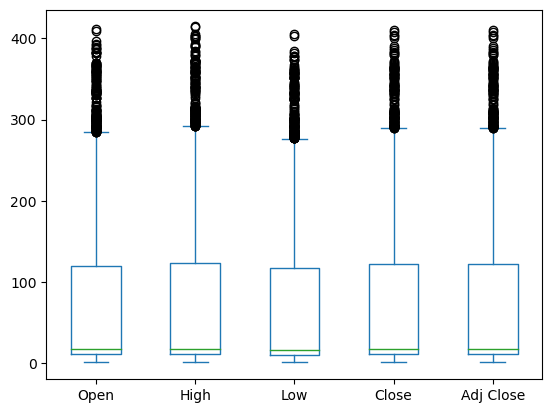

In [8]:
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box');

In [9]:
## diff way in video that plotly wasnt working for me
# #setting the layout for our plot
# layout = go.Layout(
#     title='Stock Prices for Tesla',
#     xaxis=dict(
#         title='Date',
#         titlefont=dict(
#             family='Courier New, monospace',
#             size=18,
#             color='#7f7f7f'
#         )
#     ),
#     yaxis=dict(
#         title='Price',
#         titlefont=dict(
#             family='Courier New, monospace',
#             size=18,
#             color='#7f7f7f'
#         )
#     )

# )

# tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
# plot = go.Figure(data=tesla_data, layout=layout)

In [10]:
# iplot(plot)

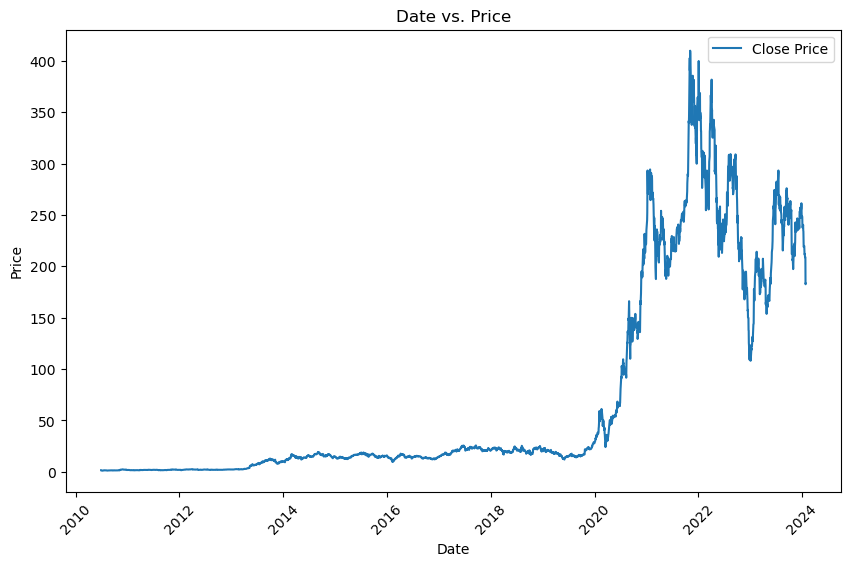

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tesla['Date'], tesla['Close'], label='Close Price')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs. Price')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Show plot
plt.show()

In [13]:
#train_test_split
X = np.array(tesla.index).reshape(-1,1)
y = tesla['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=732)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

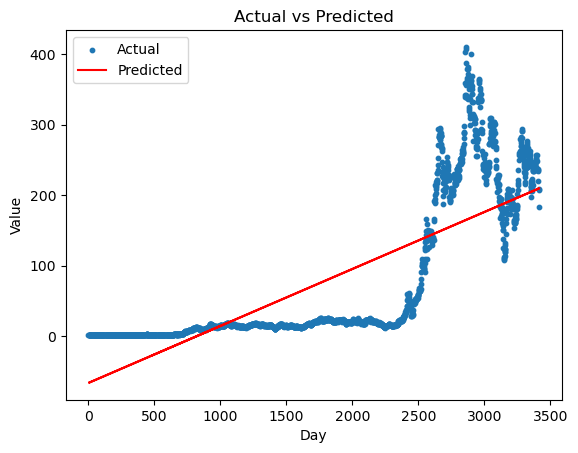

In [17]:
#try to add in hover over plot
# Plot Actual
plt.scatter(X_train.T[0], y_train, label='Actual', s=10)

# Plot Predicted
predicted_values = lm.predict(X_train).T
plt.plot(X_train.T[0], predicted_values, label='Predicted', color='red')

# Add title and labels
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()

# Show plot
plt.show()

In [18]:
#calc scores
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(X_train))}\t{r2_score(y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(X_train))}\t{mse(y_test, lm.predict(X_test))}
'''

print(scores)



Metric           Train                Test        
r2_score  0.6038899913830753	0.588891143734551
MSE       4182.63458782349	4058.0835211715726



## LSTM  (from video)

In [12]:
#reload data
tesla = pd.read_csv('TSLA.csv')

In [13]:
tesla1 = tesla.copy()

In [14]:
tesla1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3418 non-null   object 
 1   Open       3418 non-null   float64
 2   High       3418 non-null   float64
 3   Low        3418 non-null   float64
 4   Close      3418 non-null   float64
 5   Adj Close  3418 non-null   float64
 6   Volume     3418 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 187.0+ KB


In [15]:
tesla1.Date = pd.to_datetime(tesla1['Date'])

# Reset index
tesla1.reset_index(drop=True, inplace=True)

In [16]:
# Split the data into training and test sets
train_data = tesla1[tesla1['Date'] < '2022-01-01']
test_data = tesla1[tesla1['Date'] >= '2022-01-01']


# Print the shapes of the training and test sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (2899, 7)
Test set shape: (519, 7)


In [17]:
# #if one of the cols needs to be changed to num from obj
# tesla["Close"]=pd.to_numeric(tesla.Close, errors='coerce')
# tesla = tesla.dropna()
trainData = train_data.iloc[:,4:5].values

In [18]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2899, 1)

In [19]:
X_train = []
y_train = []

for i in range (60,2899): #60: timestep // 2899: length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch size axis
X_train.shape

(2839, 60, 1)

In [46]:
model = Sequential ()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape [1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam', loss= "mean_squared_error")

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_7 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100)              

In [48]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20


2024-02-14 13:39:42.938642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:43.331101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:43.514144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:43.701022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:43.874127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:44.112787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:39:44.531420: I tensorflow/core/grappler/optimizers/cust

89/89 - 12s - loss: 0.0027 - 12s/epoch - 138ms/step
Epoch 2/20
89/89 - 7s - loss: 0.0011 - 7s/epoch - 74ms/step
Epoch 3/20
89/89 - 7s - loss: 7.4818e-04 - 7s/epoch - 74ms/step
Epoch 4/20
89/89 - 7s - loss: 8.3584e-04 - 7s/epoch - 75ms/step
Epoch 5/20
89/89 - 7s - loss: 5.7302e-04 - 7s/epoch - 75ms/step
Epoch 6/20
89/89 - 7s - loss: 6.3134e-04 - 7s/epoch - 77ms/step
Epoch 7/20
89/89 - 7s - loss: 5.8955e-04 - 7s/epoch - 75ms/step
Epoch 8/20
89/89 - 7s - loss: 5.5697e-04 - 7s/epoch - 75ms/step
Epoch 9/20
89/89 - 7s - loss: 5.2029e-04 - 7s/epoch - 74ms/step
Epoch 10/20
89/89 - 7s - loss: 3.9840e-04 - 7s/epoch - 75ms/step
Epoch 11/20
89/89 - 7s - loss: 5.7562e-04 - 7s/epoch - 76ms/step
Epoch 12/20
89/89 - 7s - loss: 6.0882e-04 - 7s/epoch - 77ms/step
Epoch 13/20
89/89 - 7s - loss: 4.1185e-04 - 7s/epoch - 79ms/step
Epoch 14/20
89/89 - 7s - loss: 4.6674e-04 - 7s/epoch - 77ms/step
Epoch 15/20
89/89 - 7s - loss: 4.3084e-04 - 7s/epoch - 76ms/step
Epoch 16/20
89/89 - 7s - loss: 4.4694e-04 - 7s/epo

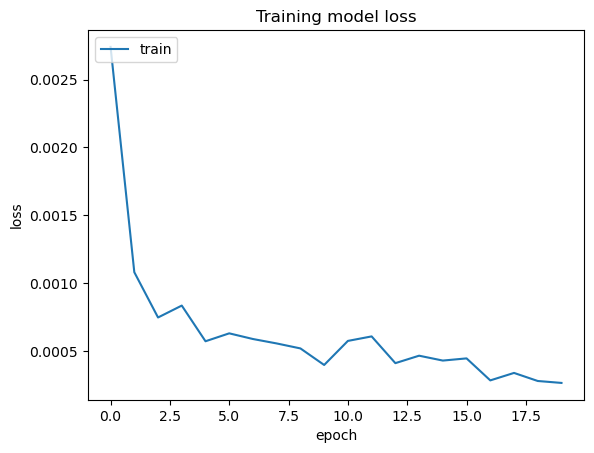

In [49]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [50]:
testData = test_data.iloc [:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(459, 60, 1)

In [51]:
y_pred = model.predict(X_test)

2024-02-14 13:42:02.614651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:42:02.748844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:42:02.919366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-14 13:42:03.095429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/15 [=>............................] - ETA: 16s

2024-02-14 13:42:03.269337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 78ms/step


In [52]:
predicted_price = sc.inverse_transform(y_pred)

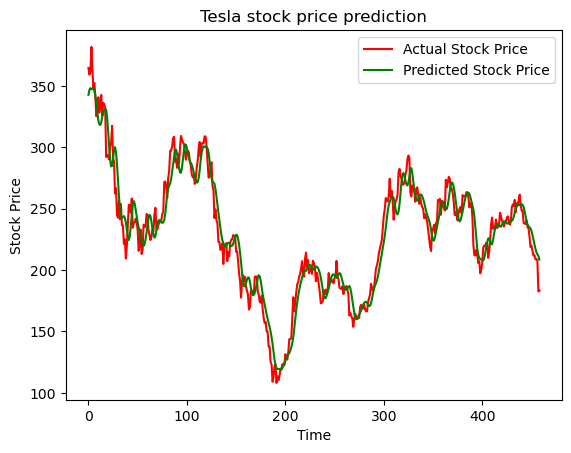

In [53]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Tesla stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Predicting future values

1/1 [==============================] - 0s 49ms/step


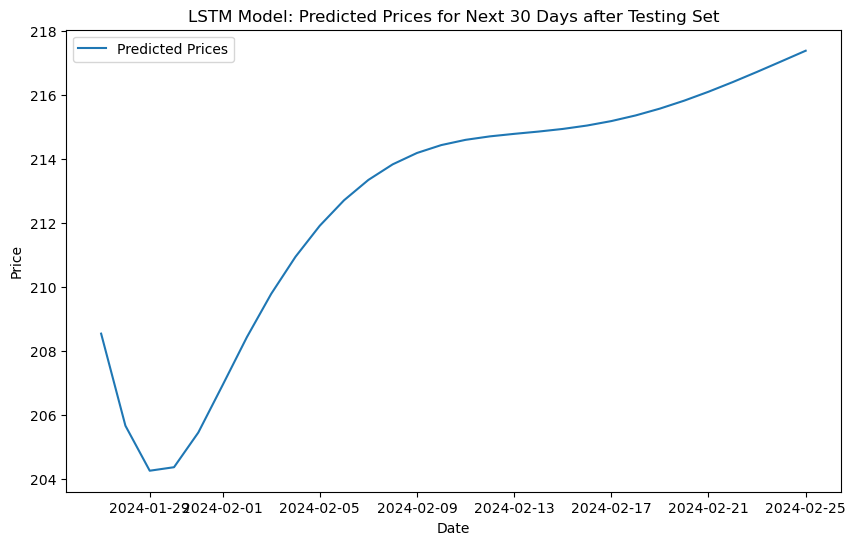

In [59]:
# Prepare the input data for prediction using the last 60 days of the testing set
last_60_days_test = X_test[-1:]

predicted_prices = []

# Predict the next 30 days
for i in range(30):
    # Predict the next day's price
    next_day_prediction = model.predict(last_60_days_test)
    predicted_prices.append(next_day_prediction[0, 0])
    
    # Update input data for the next prediction
    last_60_days_test = np.append(last_60_days_test[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices to get the original scale
predicted_prices = sc.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Generate date range for the next 30 days after the testing set
last_date = pd.to_datetime(test_data['Date'].iloc[-1])
next_30_days_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(next_30_days_dates, predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Model: Predicted Prices for Next 30 Days after Testing Set')
plt.legend()
plt.show()

Looks solidly accurate, especially if we shift it a bit to the left and to the same starting point as the actual price

## 2nd model
- more units, early stop and plateau

In [50]:
tesla.Date = pd.to_datetime(tesla['Date'])

# Reset index
tesla.reset_index(drop=True, inplace=True)

In [51]:
# Split the data into training and test sets
train_data = tesla[tesla['Date'] < '2022-01-01']
test_data = tesla[(tesla['Date'] >= '2022-01-01') & (tesla['Date'] < '2023-10-01')]
val_data = tesla[tesla['Date'] >= '2023-10-01']

# Print the shapes of the training and test sets
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)
print("Val set shape:", val_data.shape)

Training set shape: (2899, 7)
Test set shape: (438, 7)
Val set shape: (81, 7)


In [52]:
# # STILL NEED THIS, JUST MOVE IT LATER
# val_data = val_data.iloc [:,4:5]
# y_val = val_data.iloc[60:,0:].values
# #input array for the model
# val_inputClosing = val_data.iloc[:,0:].values
# val_inputClosing_scaled = sc.transform (val_inputClosing)
# val_inputClosing_scaled.shape
# X_val = []
# length = len(val_data)
# timestep = 60

# for i in range(timestep, length):
#     X_val.append(val_inputClosing_scaled[i-timestep:i,0])
# X_val = np.array(X_val)
# X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
# X_val.shape

# test_data = test_data.iloc [:,4:5]
# y_test = test_data.iloc[60:,0:].values
# #input array for the model
# test_inputClosing = test_data.iloc[:,0:].values
# test_inputClosing_scaled = sc.transform(test_inputClosing)
# test_inputClosing_scaled.shape
# X_test = []
# length = len(test_data)
# timestep = 60

# for i in range(timestep, length):
#     X_test.append(test_inputClosing_scaled[i-timestep:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# X_test.shape

In [53]:
# Prepare the training data
train_data = train_data.iloc[:, 4:5].values  
sc = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = sc.fit_transform(train_data)

# Apply the same scaler to the test data
test_data_scaled = sc.transform(test_data.iloc[:, 4:5].values)

# Apply the same scaler to the validation data
val_data_scaled = sc.transform(val_data.iloc[:, 4:5].values)

In [54]:
# Define the function to prepare the train data
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [55]:
# Set the time steps for the RNN
time_steps = 60

In [56]:
# Prepare the training data for RNN
X_train, y_train = prepare_data(train_data_scaled, time_steps)

# Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Prepare the training data for RNN
X_test, y_test = prepare_data(test_data_scaled, time_steps)

# Reshape the data for LSTM (samples, time steps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prepare the training data for RNN
X_val, y_val = prepare_data(val_data_scaled, time_steps)

# Reshape the data for LSTM (samples, time steps, features)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [57]:
# Define the RNN model
model2 = Sequential()
model2.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=128, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=64))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

#print summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 256)           264192    
                                                                 
 dropout_3 (Dropout)         (None, 60, 256)           0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 128)           197120    
                                                                 
 dropout_4 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [58]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',             # monitor loss for early stopping
    patience=7,                      # Number of epochs with no improvement before stopping
    min_delta=1e-5,                  # Minimum change in the monitored metric to be considered an improvement
    restore_best_weights=True        # Restore the weights from the epoch with the best monitored metric
)

plateau = ReduceLROnPlateau(
    monitor='val_loss',              # monitor loss for reducing learning rate
    factor=0.2,                      # Factor by which the learning rate will be reduced
    patience=2,                      # Number of epochs with no improvement before reducing learning rate
    min_delta=1e-5,                   # Minimum change in the monitored metric to be considered an improvement
    cooldown=0,                      # Number of epochs to wait after reducing learning rate before resuming normal operation
    verbose=2                        # create a message statement
)

In [60]:
# Train the model
history = model2.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, plateau])

Epoch 1/10


2024-02-18 14:58:23.968237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:24.262462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:24.439556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:24.606933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:24.814293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:25.126892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:25.439704: I tensorflow/core/grappler/optimizers/cust

89/89 [==============================] - ETA: 0s - loss: 0.0024

2024-02-18 14:58:32.564563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:32.669285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:32.820582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:58:32.981898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


89/89 [==============================] - 11s 92ms/step - loss: 0.0024 - val_loss: 0.0063 - lr: 0.0010
Epoch 2/10
89/89 [==============================] - 6s 64ms/step - loss: 8.5710e-04 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/10
89/89 [==============================] - 6s 66ms/step - loss: 5.7617e-04 - val_loss: 0.0024 - lr: 0.0010
Epoch 4/10
89/89 [==============================] - 6s 66ms/step - loss: 4.6837e-04 - val_loss: 0.0021 - lr: 0.0010
Epoch 5/10
89/89 [==============================] - 6s 66ms/step - loss: 4.6954e-04 - val_loss: 0.0017 - lr: 0.0010
Epoch 6/10
89/89 [==============================] - 6s 66ms/step - loss: 3.8128e-04 - val_loss: 0.0059 - lr: 0.0010
Epoch 7/10
89/89 [==============================] - ETA: 0s - loss: 3.9888e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
89/89 [==============================] - 6s 66ms/step - loss: 3.9888e-04 - val_loss: 0.0025 - lr: 0.0010
Epoch 8/10
89/89 [==============================] - 6s 66

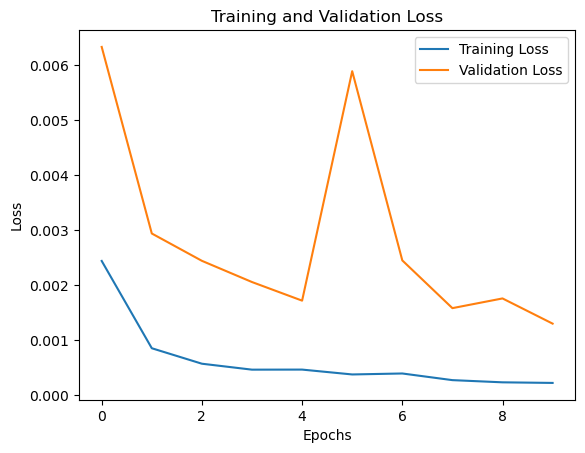

In [61]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Could be that 5 epochs is good or 11, or 14.

### Predicting on val set

In [62]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 3337 to 3417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       81 non-null     datetime64[ns]
 1   Open       81 non-null     float64       
 2   High       81 non-null     float64       
 3   Low        81 non-null     float64       
 4   Close      81 non-null     float64       
 5   Adj Close  81 non-null     float64       
 6   Volume     81 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 5.1 KB


In [63]:
print(f'Dataframe contains stock prices between {val_data.Date.min()} {val_data.Date.max()}')
print(f'Total Days = {(val_data.Date.max() - val_data.Date.min()).days} days')

Dataframe contains stock prices between 2023-10-02 00:00:00 2024-01-26 00:00:00
Total Days = 116 days


In [64]:
y_pred = model2.predict(X_val)

2024-02-18 14:59:27.054682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:59:27.155226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:59:27.300288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-02-18 14:59:27.453313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 792ms/step


In [65]:
predicted_price = sc.inverse_transform(y_pred)
actual_prices = sc.inverse_transform(y_val.reshape(-1, 1))

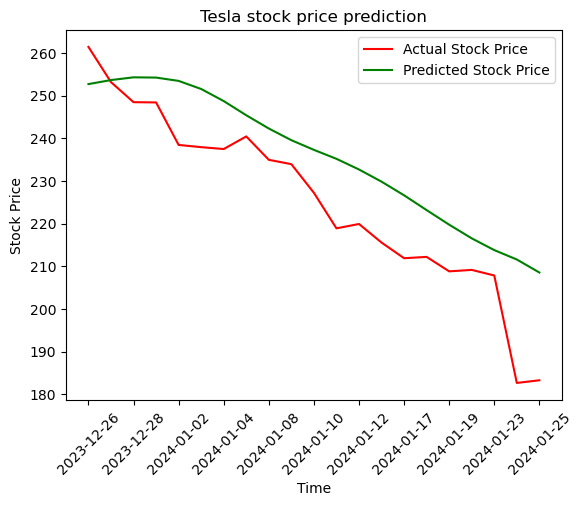

In [66]:
plt.plot(actual_prices, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')

# Define the x-axis ticks with dates
x_ticks = val_data['Date'].iloc[-22:]
x_tick_locs = range(0, len(x_ticks), len(x_ticks)//10)  # Set ticks every 1/10th of the data

# Set the x-axis ticks and labels
plt.xticks(x_tick_locs, x_ticks.iloc[x_tick_locs].dt.strftime('%Y-%m-%d'), rotation=45)

plt.title('Tesla stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Then predict into the future

1/1 [==============================] - 0s 37ms/step


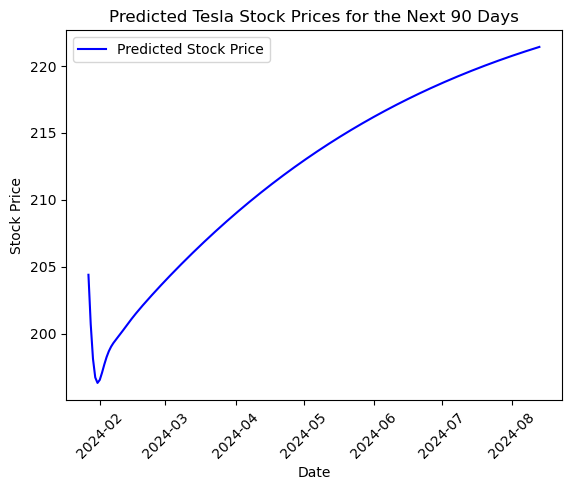

In [67]:
# Get the most recent 60 days of data
last_60_days = val_data_scaled[-60:]

# Create an empty list to store the predicted prices
predicted_prices = []

# Generate predictions for the next 90 days
for i in range(200):
    # Reshape the input data to match the model's input shape
    input_data = np.reshape(last_60_days, (1, 60, 1))
    
    # Use the model to predict the next day's price
    next_day_prediction = model2.predict(input_data)
    
    # Append the prediction to the list of predicted prices
    predicted_prices.append(next_day_prediction[0, 0])
    
    # Update the input data for the next iteration
    last_60_days = np.append(last_60_days[1:], next_day_prediction)

# Inverse transform the predicted prices
predicted_prices = sc.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Generate dates for the next 90 days
next_90_days_dates = pd.date_range(start=val_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=200)

# Visualize the predicted prices
plt.plot(next_90_days_dates, predicted_prices, color='blue', label='Predicted Stock Price')

# Set the x-axis ticks and labels
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted Tesla Stock Prices for the Next 90 Days')
plt.legend()
plt.show()

This wasn't very successful. Let's move on and try google stock.

### Google stock(from notebook link)

In [2]:
df = pd.read_csv('GOOG.csv')

goog = df.copy()

goog.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512

In [3]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4909 non-null   object 
 1   Open       4909 non-null   float64
 2   High       4909 non-null   float64
 3   Low        4909 non-null   float64
 4   Close      4909 non-null   float64
 5   Adj Close  4909 non-null   float64
 6   Volume     4909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 268.6+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [5]:
# T transpose df. apply to round each value to three decimal places. 
# apply x 2, 1 for each column, and then for each row. 
df.describe().T.apply(lambda x: x.apply('{0:.3f}'.format))

count           mean            std         min           25%  \
Open       4909.000         42.528         39.740       2.470        12.876   
High       4909.000         42.978         40.190       2.534        13.004   
Low        4909.000         42.100         39.341       2.390        12.767   
Close      4909.000         42.548         39.773       2.491        12.904   
Adj Close  4909.000         42.548         39.773       2.491        12.904   
Volume     4909.000  117912516.336  150774970.470  158434.000  28178000.000   

                    50%            75%             max  
Open             26.688         58.502         154.010  
High             26.896         58.931         155.200  
Low              26.468         57.905         152.920  
Close            26.678         58.425         154.840  
Adj Close        26.678         58.425         154.840  
Volume     59566000.000  145892800.000  1650832619.000

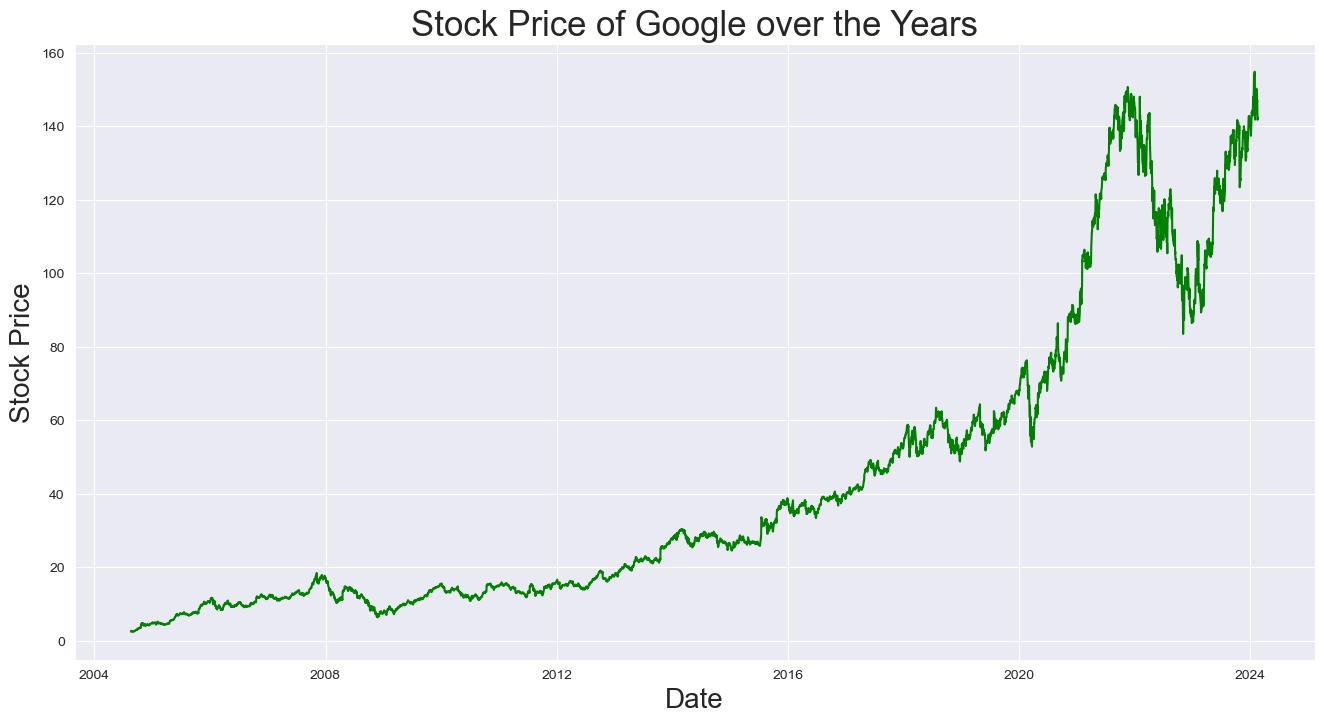

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Google over the Years',size=25);

In [7]:
import plotly.graph_objects as go
# go.Figure: creates fig object.
# data=go.Ohlc(...): specifies data. OHLC chart (go.Ohlc), 
# fin chart used to show price movements over time. 
# OHLC: Open, High, Low, Close.
# x=df.index: x axis for ohlc.  df.index represents time/ dates

fig = go.Figure(data=go.Ohlc(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]))
fig.update_layout(title_text="OHLC Chart", title_x=0.5)# center title
fig.show()

### EDA

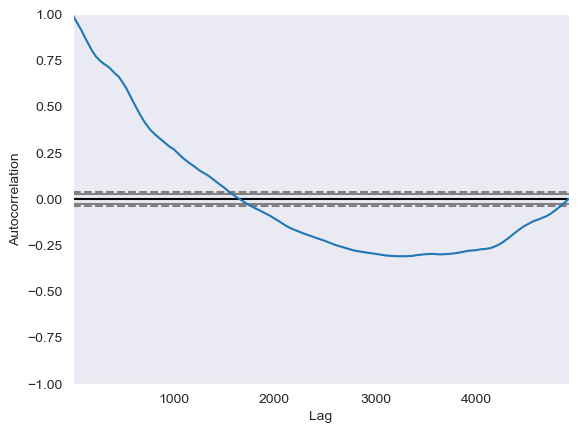

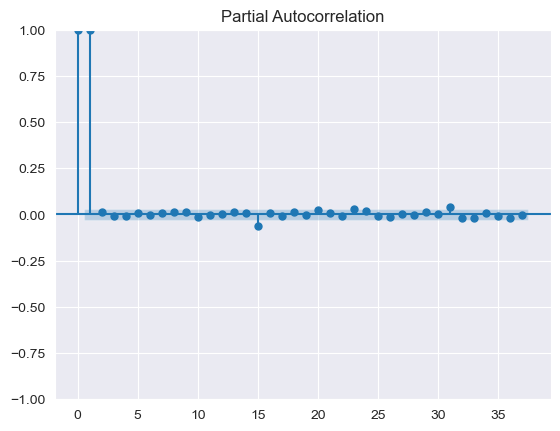

In [8]:
autocorrelation_plot(df['Close'])
plot_pacf(df['Close'])
plt.show()

Autocorelation- This pattern could indicate a time series with a cyclical or seasonal component that diminishes over time. It might suggest that the series exhibits some level of persistence or memory of its past values, but this effect fades away as the time lag increases.

PCF- This pattern often indicates that there are one or more seasonal components in the time series data. The significant peaks in the PACF plot represent the direct effect of those seasonal lags on the current observation, while the flat line indicates that there is no significant correlation beyond those seasonal lags.

In practical terms, identifying such a pattern helps in determining the appropriate lag values for seasonal components when building time series models such as ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal AutoRegressive Integrated Moving Average). It suggests that including terms corresponding to those significant lags in the model can capture the seasonal behavior of the time series effectively.

Now lets do an ADF test for stationarity. Stationarity is a crucial assumption in many time series analysis techniques.

In [9]:
def ad_test(dataset):
    # The autolag='AIC' argument automatically selects the optimal number of lags for the test 
    # based on the Akaike Information Criterion (AIC)
    dftest = adfuller(dataset, autolag = 'AIC')
    #print test stat
    print('ADF:', dftest[0])
    #print p-val
    print('P-value:', dftest[1])
    #print ideal num of lags
    print('No. of lags:', dftest[2])
    #print num obvservations used
    print('Observation:', dftest[3])
    # print the crit values for diff conf levels.
    print('Critical values:')
    for key, val in dftest[4].items():
        print('\t', key, ':', val)
ad_test(df['Close'])

ADF: 1.2201328598099461
P-value: 0.9961220727772436
No. of lags: 31
Observation: 4877
Critical values:
	 1% : -3.431691551201478
	 5% : -2.8621328172729257
	 10% : -2.5670855579185634


High p val means fail to reject null, and thus assume data is non-stationary. Since ADF stat is greater than all the crit values we fail to reject null

In [10]:
data = df['Close']
length = int(len(df['Close']) * 0.90)
print('Length:', length)
print('Data length:',len(data))
train = data.iloc[:length]
print('training shape',train.shape)
test = data.iloc[length:]
print('testing shape',test.shape)

Length: 4418
Data length: 4909
training shape (4418,)
testing shape (491,)


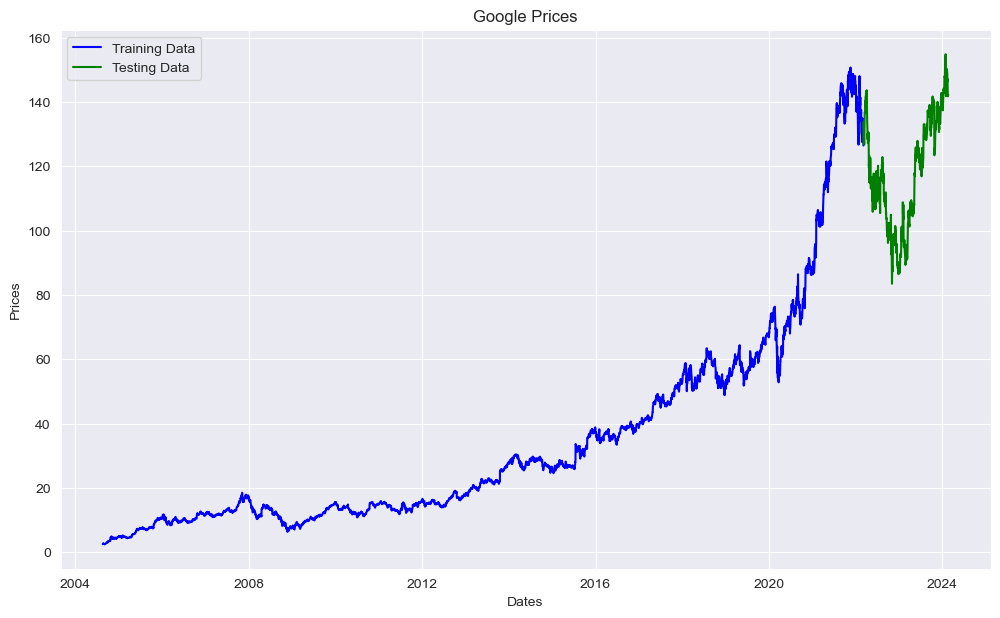

In [12]:
plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train, 'blue', label='Training Data')
plt.plot(test, 'green', label='Testing Data')
plt.legend();